In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

In [7]:
def region_growing(img, seed, threshold=10):
    h, w = img.shape
    segmented = np.zeros_like(img, np.uint8)
    queue = deque([seed])
    seed_intensity = img[seed]
    while queue:
        x, y = queue.popleft()
        if segmented[x, y] == 0:
            diff = abs(int(img[x, y]) - int(seed_intensity))
            if diff < threshold:
                segmented[x, y] = 255
                for i in range(-1, 2):
                    for j in range(-1, 2):
                        nx, ny = x + i, y + j
                        if 0 <= nx < h and 0 <= ny < w:
                            if segmented[nx, ny] == 0:
                                queue.append((nx, ny))
    return segmented

In [9]:
# Load and preprocess
img = cv2.imread("sample.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

# Add blobs
for _ in range(5):
    x, y = np.random.randint(30, 226), np.random.randint(30, 226)
    cv2.circle(img, (x, y), 10, 200 + np.random.randint(-30, 30), -1)


In [10]:
# Find candidate seeds using thresholding 
_, binary = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
num_labels, labels = cv2.connectedComponents(binary)

In [11]:
# Perform region growing from each seed
segmented_total = np.zeros_like(img)
for label in range(1, num_labels):
    ys, xs = np.where(labels == label)
    if len(xs) > 0:
        seed = (ys[len(ys)//2], xs[len(xs)//2])
        region = region_growing(img, seed, threshold=15)
        segmented_total = cv2.bitwise_or(segmented_total, region)

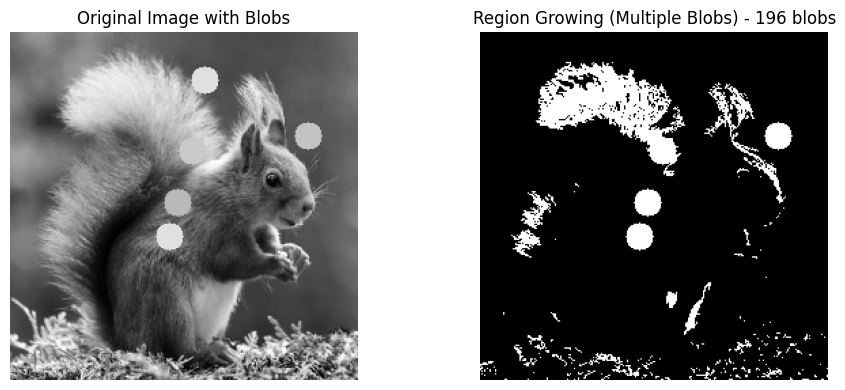

In [12]:
# Display
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image with Blobs")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_total, cmap='gray')
plt.title(f"Region Growing (Multiple Blobs) - {num_labels-1} blobs")
plt.axis('off')

plt.tight_layout()
plt.show()

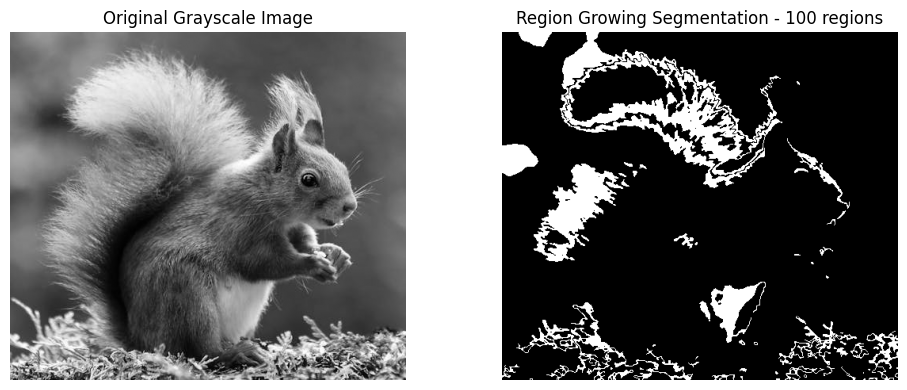

In [14]:
# Without adding artificial blobs

import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

def region_growing(img, seed, threshold=10):
    """Simple region growing from a single seed point."""
    h, w = img.shape
    segmented = np.zeros_like(img, np.uint8)
    queue = deque([seed])
    seed_intensity = img[seed]
    
    while queue:
        x, y = queue.popleft()
        if segmented[x, y] == 0:
            diff = abs(int(img[x, y]) - int(seed_intensity))
            if diff < threshold:
                segmented[x, y] = 255
                for i in range(-1, 2):
                    for j in range(-1, 2):
                        nx, ny = x + i, y + j
                        if 0 <= nx < h and 0 <= ny < w and segmented[nx, ny] == 0:
                            queue.append((nx, ny))
    return segmented


# ===== Load image and preprocess =====
# Replace 'image.png' with your actual image filename
img_color = cv2.imread("sample.jpg")
gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Optional: smooth image slightly to reduce noise
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

# ===== Find candidate seed regions =====
# You can adjust threshold (e.g. 150 for bright regions)
_, binary = cv2.threshold(gray_blur, 150, 255, cv2.THRESH_BINARY)
num_labels, labels = cv2.connectedComponents(binary)

# ===== Perform region growing for each seed =====
segmented_total = np.zeros_like(gray)
for label in range(1, num_labels):
    ys, xs = np.where(labels == label)
    if len(xs) > 0:
        seed = (ys[len(ys)//2], xs[len(xs)//2])  # center pixel as seed
        region = region_growing(gray_blur, seed, threshold=15)
        segmented_total = cv2.bitwise_or(segmented_total, region)

# ===== Display results =====
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_total, cmap='gray')
plt.title(f"Region Growing Segmentation - {num_labels-1} regions")
plt.axis('off')

plt.tight_layout()
plt.show()
